# 2. Do older planes suffer more delay?

In [1]:
# Load the necessary libraries
import pandas as pd #using "pandas" package to clean up and manipulate data 
import numpy as np
import matplotlib.pyplot as plt #to plot a bar graph 
import seaborn as sns
import os

In [2]:
# Set working directory that contains the files
os.chdir("/Users/sugianto/Desktop/dataverse_files")
os.getcwd()

'/Users/sugianto/Desktop/dataverse_files'

In [3]:
#read data
data1 = pd.read_csv("2004.csv") #import data for year 2004
data2 = pd.read_csv("2005.csv") #import data for year 2005

airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
airplanes = pd.read_csv("plane-data.csv")

In [4]:
#Datas without cancelled and diverted flights.
data1 = data1[(data1.Cancelled == 0) & (data1.Diverted == 0)]
data2 = data2[(data2.Cancelled == 0) & (data2.Diverted == 0)]

In [5]:
#check for NA's in 2004 and 2005
print(data1.isna().sum())
print(data2.isna().sum())

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6987722
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
C

In [6]:
# perform full join on data1 and data2
data = pd.merge(data1, data2, how='outer')

In [7]:
#explore the data
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [8]:
#Create delay column
data['delay'] = ((data['DepDelay'])+(data['ArrDelay']))

In [9]:
# Look for missing values
data.isna().sum()

# Remove rows where Cancelled and Diverted columns are equal to 0 for DepDelay and ArrDelay columns
data = data[(data['Cancelled'] == 0) & (data['Diverted'] == 0) & (~data['DepDelay'].isna()) & (~data['ArrDelay'].isna())]

In [10]:
# Match name of variable in data to airplane data
data.rename(columns={"TailNum": "tailnum"}, inplace=True)

# Join data and airplane data
data_airplanes = pd.merge(data, airplanes[["tailnum", "year"]], on="tailnum", how="inner")

# Edit the joined dataframe
data_airplanes.rename(columns={"year": "plane_year"}, inplace=True)
data_airplanes["plane_year"] = pd.to_numeric(data_airplanes["plane_year"], errors="coerce")
data_airplanes.dropna(subset=["plane_year"], inplace=True)

# Explore data_airplanes
print(data_airplanes)

          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0         2004      1          12          1    623.0         630    901.0   
1         2004      1          10          6   1554.0        1520   1831.0   
2         2004      1          19          1   2042.0        2045   2309.0   
3         2004      1          19          1   1634.0        1640   1953.0   
4         2004      1           6          2    859.0         900   1158.0   
...        ...    ...         ...        ...      ...         ...      ...   
10195618  2005     12          13          2   1558.0        1605   1709.0   
10195619  2005     12          13          2   1414.0        1415   1517.0   
10195620  2005     12          23          5    704.0         700   1219.0   
10195621  2005     12          20          2   1658.0        1700   2136.0   
10195622  2005     12          12          1    843.0         845   1408.0   

          CRSArrTime UniqueCarrier  FlightNum  ... Cancelled  \

In [11]:
# join data and airplane data
data.rename(columns={'TailNum': 'tailnum'}, inplace=True)
data_airplanes = pd.merge(data, airplanes[['tailnum', 'year']], on='tailnum')

# edit the joined df
data_airplanes.rename(columns={'year': 'plane_year'}, inplace=True)
data_airplanes['plane_year'] = pd.to_numeric(data_airplanes['plane_year'], errors='coerce')
data_airplanes.dropna(subset=['plane_year'], inplace=True)

# add plane_condition column and define category
data_airplanes['plane_condition'] = np.where(data_airplanes['plane_year'] <= 1987, 'old', 'new')

# Total no. of old and new planes
print(data_airplanes.groupby('plane_condition').size().reset_index(name='count').sort_values(by='count', ascending=False))

  plane_condition    count
0             new  8146989
1             old  1165290


In [12]:
# Mean delay for old vs. new planes
mean_plane = data_airplanes.groupby('plane_condition')['DepDelay', 'ArrDelay'].mean().reset_index()
mean_plane.rename(columns={'DepDelay': 'Total_avg_delay'}, inplace=True)

# Create data for flight total
tot_plane = data_airplanes[['plane_condition', 'delay']].copy()
tot_plane['Flights'] = 1
tot_plane = tot_plane.groupby('plane_condition').agg({'Flights': 'sum', 'delay': 'mean'}).reset_index()
tot_plane.rename(columns={'Flights': 'Total_Flights'}, inplace=True)
tot_plane['Flights_perc'] = tot_plane['Total_Flights'] / (8146989 + 1165290) * 100

# Create data for delays
tot2_plane = data_airplanes[['plane_condition', 'DepDelay', 'ArrDelay']].copy()
tot2_plane = tot2_plane[(tot2_plane['DepDelay'] > 0) | (tot2_plane['ArrDelay'] > 0)]
tot2_plane['Delays'] = 1
tot2_plane = tot2_plane.groupby('plane_condition')['Delays'].sum().reset_index()
tot2_plane.rename(columns={'Delays': 'Total_Delays'}, inplace=True)

# add plane_condition column and define category
data_airplanes['plane_condition'] = np.where(data_airplanes['plane_year'] <= 1987, "old", "new")

# Total no. of old and new planes
tot_plane = data_airplanes.groupby('plane_condition').size().reset_index(name='Flights').sort_values('Flights', ascending=False)
tot_plane['Flights_perc'] = tot_plane['Flights'] / (8146989 + 1165290) * 100

# Mean delay for old vs. new planes
mean_plane = data_airplanes.groupby('plane_condition')['delay'].mean().reset_index(name='Total_avg_delay')

# Create data for delays
tot2_plane = data_airplanes[['plane_condition', 'DepDelay', 'ArrDelay']]
tot2_plane = tot2_plane[(tot2_plane['DepDelay'] > 0) | (tot2_plane['ArrDelay'] > 0)]
tot2_plane = tot2_plane.groupby('plane_condition').size().reset_index(name='Delays').sort_values('Delays', ascending=False)
tot2_plane['Delays_perc'] = tot2_plane['Delays'] / tot_plane['Flights']

# Join
tot3_plane = pd.merge(tot_plane, tot2_plane, on='plane_condition', how='left')
tot3_plane['Delays_perc'] = tot3_plane['Delays'] / tot3_plane['Flights']
tot3_plane = tot3_plane.sort_values('Delays_perc')

# Join with mean
all_plane = pd.merge(tot3_plane, mean_plane, on='plane_condition', how='left')
all_plane

/var/folders/vl/v7290b8s297_hp6k0mts1x640000gn/T/ipykernel_5141/801497822.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_plane = data_airplanes.groupby('plane_condition')['DepDelay', 'ArrDelay'].mean().reset_index()


,plane_condition,Flights,Flights_perc,Delays,Delays_perc,Total_avg_delay
0,new,8146989,87.486522,4179778,0.513046,14.976610
1,old,1165290,12.513478,618822,0.531045,15.801298


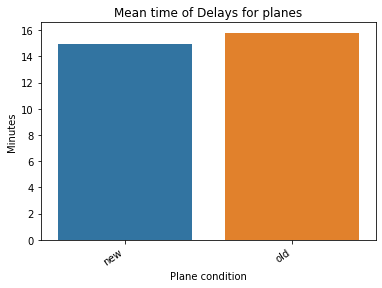

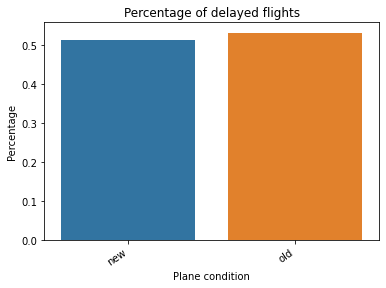

In [13]:
# Mean time of delays for planes
sns.barplot(x='plane_condition', y='Total_avg_delay', data=mean_plane)
plt.xlabel('Plane condition')
plt.ylabel('Minutes')
plt.title('Mean time of Delays for planes')
plt.xticks(rotation=35, ha='right')
plt.show()

# Percentage of delayed flights
sns.barplot(x='plane_condition', y='Delays_perc', data=all_plane)
plt.xlabel('Plane condition')
plt.ylabel('Percentage')
plt.title('Percentage of delayed flights')
plt.xticks(rotation=35, ha='right')
plt.show()